### Import libs and data from .mat format

In [3]:
import scipy.io as spio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
import plotly.plotly
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from ipywidgets import interact, IntSlider

In [4]:

import pywt

In [5]:
# files "full_data.mat" and "acc_names.mat" are from UniMiB-SHAR.zip archive
mat = spio.loadmat('C:\\Users\\mukhin.av\\Documents\\RESEARCH\\CNN\\data\\full_data.mat', squeeze_me=False)

### Copy data in numpy array

In [6]:
# files "full_data.mat" and "acc_names.mat" are from UniMiB-SHAR.zip archive
mat_data = spio.loadmat('C:\\Users\\mukhin.av\\Documents\\RESEARCH\\CNN\\data\\acc_data.mat', squeeze_me=False)
mat_labels = spio.loadmat('C:\\Users\\mukhin.av\\Documents\\RESEARCH\\CNN\\data\\acc_labels.mat', squeeze_me=False)

In [7]:
acc_data = mat_data['acc_data'].reshape((11771, 151, 3))

In [8]:
acc_labels = mat_labels['acc_labels']

In [9]:
acc_labels

array([[ 1,  1,  1],
       [ 1,  1,  1],
       [ 1,  1,  1],
       ...,
       [17, 30,  6],
       [17, 30,  6],
       [17, 30,  6]], dtype=uint8)

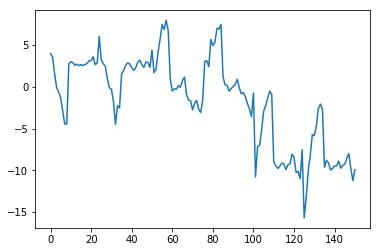

In [10]:
plt.plot(acc_data[60,:,0])

In [11]:
labels = []
for j in range(len(acc_labels)):
    labels.append('{}'.format(acc_labels[j,0]))

In [12]:
labels = np.array(labels)

In [13]:
labels

array(['1', '1', '1', ..., '17', '17', '17'], dtype='<U2')

### Creating dataset

In [14]:
widths = np.arange(2, 151 // 6)

In [15]:
import scipy.signal

In [16]:
import scipy.misc

In [19]:
def get_dataset(data, labels):
    listing_train = []
    listing_test = []
    for n in range(len(labels)):
        x_prep = data[n,:,0]
        x_prep = (x_prep - x_prep.mean()) / x_prep.std()
        x, _= pywt.cwt(x_prep, widths, 'mexh')
        
        y_prep = data[n,:,1]
        y_prep = (y_prep - y_prep.mean()) / y_prep.std()
        y, _= pywt.cwt(y_prep, widths, 'mexh')
        
        z_prep = data[n,:,2]
        z_prep = (z_prep - z_prep.mean()) / z_prep.std()
        z, _= pywt.cwt(z_prep, widths, 'mexh')
        
        tensor = np.dstack((np.abs(x), np.abs(y), np.abs(z)))
        image_name = '{}{}{}{}'.format(labels[n,0], labels[n,1],labels[n,2],n) + '.png'
    
        scipy.misc.imsave('images\\' + image_name, tensor)
        if labels[n,1] < 24:
            listing_train.append([image_name, int(labels[n,0])])
        else:
            listing_test.append([image_name, int(labels[n,0])])
            
    
        
    return listing_train, listing_test
    
    #np.savetxt("listing_train.csv", listing_train, delimiter=",", fmt='%s')
    #np.savetxt("listing_test.csv", listing_test, delimiter=",", fmt='%s')

In [20]:
listing_train, listing_test = get_dataset(acc_data, acc_labels)

C:\Users\mukhin.av\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning:

`imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.



In [21]:
from scipy.signal import wiener

In [22]:
def get_augmentation(data,labels, listing_train, listing_test):
    play = 0 
    rol = lambda x: np.roll(x,np.random.randint(low=2, high=20))
    while play < 9: 
        for n in range(len(labels)):
            win = np.random.randint(low=2, high=10)
            noi = np.random.randint(low=2, high=20)
            x_prep = data[n,:,0]
            x_prep = wiener(x_prep, mysize=win, noise = noi)
            x_prep = rol(x_prep)
            x_prep = (x_prep - x_prep.mean()) / x_prep.std()
            x, _= pywt.cwt(x_prep, widths, 'mexh')
            
            y_prep = data[n,:,1]
            win = np.random.randint(low=2, high=10)
            noi = np.random.randint(low=2, high=20)
            y_prep = wiener(y_prep, mysize=win, noise = noi)
            y_prep = rol(y_prep)
            y_prep = (y_prep - y_prep.mean()) / y_prep.std()
            y, _= pywt.cwt(y_prep, widths, 'mexh')
            
            z_prep = data[n,:,2]
            win = np.random.randint(low=2, high=10)
            noi = np.random.randint(low=2, high=20)
            z_prep = wiener(z_prep, mysize=win, noise = noi)
            z_prep = rol(z_prep)
            z_prep = (z_prep - z_prep.mean()) / z_prep.std()
            z, _= pywt.cwt(z_prep, widths, 'mexh')
            
            tensor = np.dstack((np.abs(x), np.abs(y), np.abs(z)))
            image_name = '{}{}{}{}{}'.format(labels[n,0], labels[n,1],labels[n,2],n,play) + '.png'
        
            scipy.misc.imsave('images\\' + image_name, tensor)
            
            if labels[n,1] < 24:
                listing_train.append([image_name, int(labels[n,0])])
            else:
                listing_test.append([image_name, int(labels[n,0])])
            
        play += 1
        
    return listing_train, listing_test
            
        
            

In [24]:
listing_train, listing_test = get_augmentation(acc_data, acc_labels, listing_train, listing_test)

C:\Users\mukhin.av\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning:

`imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.

C:\Users\mukhin.av\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:940: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\mukhin.av\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:940: RuntimeWarning:

invalid value encountered in multiply



In [25]:
np.savetxt("listing_train.csv", listing_train, delimiter=",", fmt='%s')
np.savetxt("listing_test.csv", listing_test, delimiter=",", fmt='%s')